<div class='bar_title'></div>

*Decision Support Systems*

# Headline

your name <br>

In [16]:
!pip install pulp
import pulp

In [17]:
counties = range(1, 9)

S = {
    'a': [1, 2],
    'b': [2, 3],
    'c': [3, 4],
    'd': [4, 5],
    'e': [5, 6],
    'f': [6, 7],
    'g': [1, 7],
    'h': [1, 8, 2, 7],
    'i': [3, 8, 2, 4],
    'j': [4, 8, 7, 6, 5]
}

In [18]:
prob = pulp.LpProblem(name ='Set_covering', sense=pulp.LpMinimize)

x = pulp.LpVariable.dicts(name='x_', indices=counties, lowBound=0, upBound=1, cat=pulp.LpBinary)

# Objective function
prob += pulp.lpSum([x[i] for i in counties])

# Constraints
for s, i in S.items():
  prob += pulp.lpSum([x[i] for i in S[s]]) >= 1

print(prob)

Set_covering:
MINIMIZE
1*x__1 + 1*x__2 + 1*x__3 + 1*x__4 + 1*x__5 + 1*x__6 + 1*x__7 + 1*x__8 + 0
SUBJECT TO
_C1: x__1 + x__2 >= 1

_C2: x__2 + x__3 >= 1

_C3: x__3 + x__4 >= 1

_C4: x__4 + x__5 >= 1

_C5: x__5 + x__6 >= 1

_C6: x__6 + x__7 >= 1

_C7: x__1 + x__7 >= 1

_C8: x__1 + x__2 + x__7 + x__8 >= 1

_C9: x__2 + x__3 + x__4 + x__8 >= 1

_C10: x__4 + x__5 + x__6 + x__7 + x__8 >= 1

VARIABLES
0 <= x__1 <= 1 Integer
0 <= x__2 <= 1 Integer
0 <= x__3 <= 1 Integer
0 <= x__4 <= 1 Integer
0 <= x__5 <= 1 Integer
0 <= x__6 <= 1 Integer
0 <= x__7 <= 1 Integer
0 <= x__8 <= 1 Integer



In [19]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_solution(selected_locations):
  # Creating a new graph visualization where only the location nodes are   shown, and the countries are labels for the regions
  # Define positions for the nodes (locations) to visually match the provided image
  positions = {
      # Locations
       1: (2, 9),  # Location 1
      2: (2, 6.25),   # Location 2
      3: (5.5, 6.25),   # Location 3
      4: (7, 6.5),   # Location 4
      5: (9, 8), # Location 5
      6: (8, 9),  # Location 6
      7: (5, 9.5),  # Location 7
      8: (5, 8),  # Location 8
      9: (1, 11),# Near 1
      10: (5, 11.25),# Near 7
      11: (10, 11),# Near 6
      12: (10, 8),# Near 5
      13: (9.75, 5),# Near 4
      14: (5, 4.75),# Near 3
      15: (1, 5),# Near 2

  }

  # Define positions for the country labels
  country_positions = {
      'a': (1.5, 8),
      'b': (3, 5.5),
      'c': (7, 5.5),
      'd': (9, 7),
      'e': (9, 9),
      'f': (7, 10),
      'g': (3, 10),
      'h': (3.25, 8),
      'i': (5, 7),
      'j': (7, 8)
  }

  # Create the graph
  G = nx.Graph()

  # Add nodes for locations
  G.add_nodes_from(positions.keys())

  # Add edges to form the regions for counties
  edges = [(1, 2), (1, 7),
           (2, 3), (2, 8),
           (3, 4),
           (4, 5), (4, 8),
           (5, 6),
           (6, 7),
           (7, 8),
           (9, 10), (9,1),
          (10, 11), (10, 7),
          (11, 12), (11, 6),
          (12, 13), (12, 5),
          (13, 14), (13, 4),
          (14, 15), (14, 3),
          (15, 2), (15, 9)
          ]
  G.add_edges_from(edges)

  # Add boundary points as nodes



  # Draw the graph
  plt.figure(figsize=(8, 6))
  nx.draw(G, pos=positions, with_labels=False, node_size=700, node_color='skyblue', font_size=10)
  for loc in range(1, 9):
      plt.text(*positions[loc], str(loc), size=12, ha='center', va='center')

  # Adding country labels to the plot
  for country, pos in country_positions.items():
      plt.text(pos[0], pos[1], country, size=12, ha='center', va='center')

  # Highlight the selected locations
  nx.draw_networkx_nodes(G, pos=positions, nodelist=selected_locations, node_color='lightgreen', node_size=1000)

  # Show the plot with highlighted service center locations
  plt.title('Service Centers and Counties')
  plt.show()


Status: Optimal
x__2 = 1.0
x__4 = 1.0
x__6 = 1.0
x__7 = 1.0


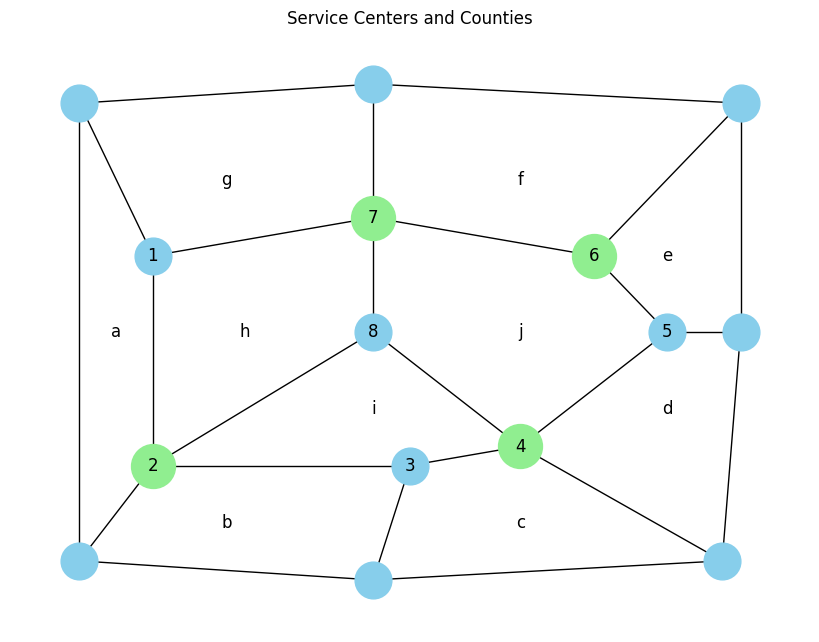

In [20]:
prob.solve()

print("Status:", pulp.LpStatus[prob.status])
for v in prob.variables():
  if v.varValue > 0:
    print(v.name, "=", v.varValue)
  selected_locations = [int(v.name.split("_")[-1]) for v in prob.variables() if v.varValue > 0]
# Plot the solution
plot_solution(selected_locations)

In [21]:
for v in prob.variables():
  if v.varValue > 0:
    print(v.name, '=', v.varValue)

x__2 = 1.0
x__4 = 1.0
x__6 = 1.0
x__7 = 1.0
